In [2]:
from util.utils import load_dataset, compute_segmentation
import numpy as np
import matplotlib.pyplot as plt
from util.segmentation import kmeans_fast
from util.segmentation import color_position_features
from skimage import io

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
train_img_dir = './datasets/AFHQ/train/cat/'
train_img_inst_dir = './datasets/AFHQ/train/cat_inst/'

In [4]:
np.random.seed(0)
imgs = load_dataset(train_img_dir)

# kNN Clustering Method for Segmentation Maps
In this section, we experiment with the kNN clustering method to produce baseline segmentation maps. We expect the reconstruction of the original image through the SPADE architecture will produce low fidelity images since this method produces "low quality" segmentations. Here, we loosely define low quality segmentation maps, but we will rigorously define the fidelity of the reconstructed image

In [11]:
k = 5
segmentations = []
for i in range(10):                     #, img in enumerate(imgs):
    segments = compute_segmentation(imgs[i], k, clustering_fn=kmeans_fast, feature_fn=color_position_features)
    segmentations.append(segments)
    
    # save segmentation map to ./datasets/cat_images/val_inst
    io.imsave(train_img_inst_dir+str(i)+'.png', segments)
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: ./datasets/AFHQ/train/cat_inst/0.png is a low contrast image
  
Lossy conversion from int64 to uint8. Range [0, 4]. Convert image to uint8 prior to saving to suppress this warning.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: ./datasets/AFHQ/train/cat_inst/1.png is a low contrast image
  
Lossy conversion from int64 to uint8. Range [0, 4]. Convert image to uint8 prior to saving to suppress this warning.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: ./datasets/AFHQ/train/cat_inst/2.png is a low contrast image
  
Lossy conversion from int64 to uint8. Range [0, 4]. Convert image to uint8 prior to saving to suppress this warning.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: ./datasets/AFHQ/train/cat_inst/3.png is a low contrast image
  
Lossy conversion from int64 to uint8. Range [0, 4]. Convert image to uint8 prior to s

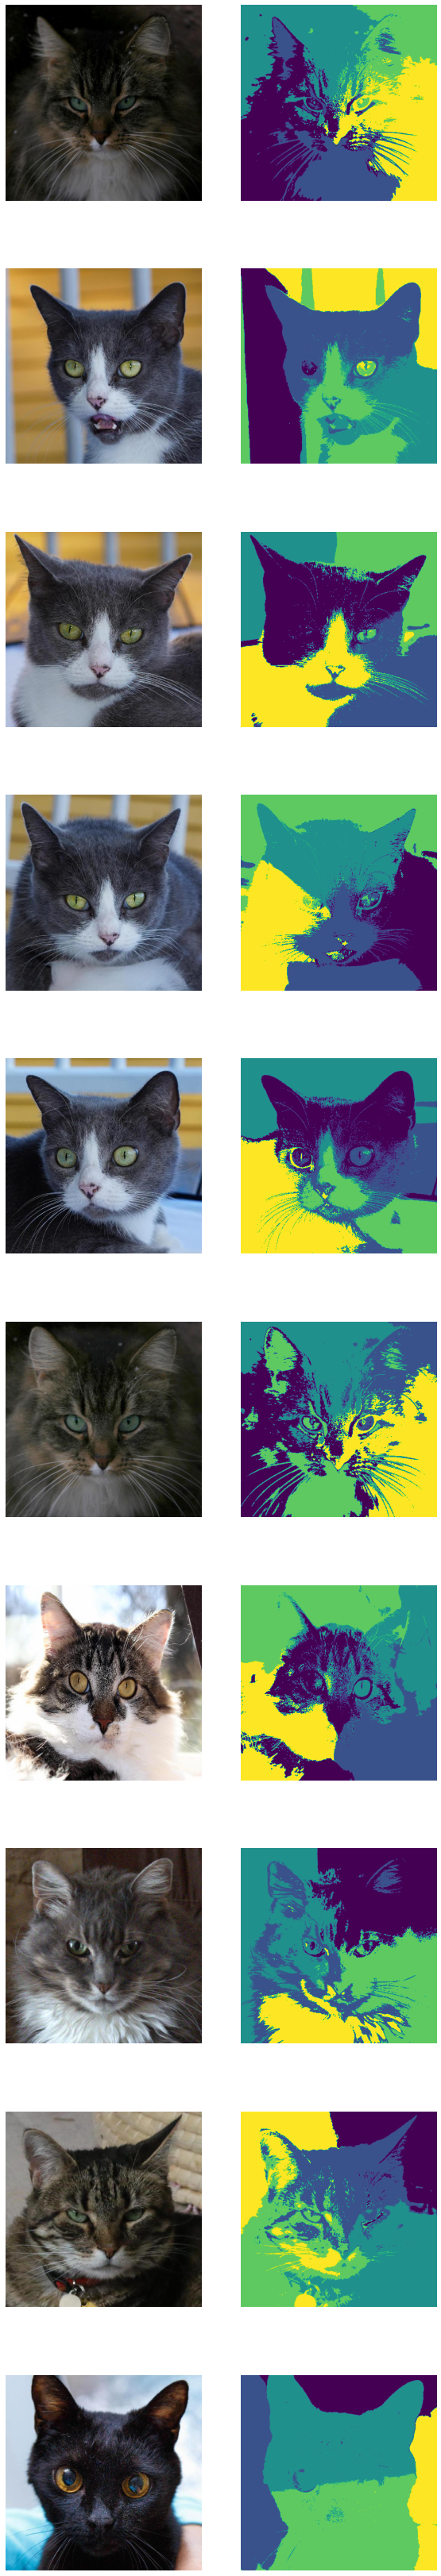

In [12]:
#N = len(imgs)
N = 10
plt.figure(figsize=(15,60))
for i in range(N):

    plt.subplot(N, 3, (i * 3) + 1)
    plt.imshow(imgs[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 2)
    plt.imshow(segmentations[i])
    plt.axis('off')